#1.0 Introduction.


The housing market is a key economic indicator, reflecting socio-economic trends and influencing various sectors. This project aims to analyze housing market dynamics using Principal Component Analysis (PCA) and Linear Regression.

We utilize a dataset containing diverse housing-related features, such as crime rates, zoning regulations, and socio-economic indicators. Our goal is to develop a predictive model for median housing prices (MEDV) based on these features.

PCA is employed to reduce the dimensionality of the dataset and identify significant components capturing variance. We then fit a Linear Regression model to the transformed PCA data to predict housing prices.

This study provides insights into factors driving housing prices, offering practical implications for real estate stakeholders. By leveraging advanced analytical techniques, we contribute to the understanding of housing market dynamics and inform decision-making processes.

#2.0 Libraries.

In [ ]:
#Importing and Loading Data.
import numpy as np
import pandas as pd
from google.colab import files

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import missingno as msno

#Sklearn Libraries.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.metrics import mean_squared_error as mse, r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline


#3.0 Importing Data and Preliminary EDA.


In [ ]:
#Upload the excel file.
uploaded = files.upload()

Saving HousingData[1].csv to HousingData[1].csv


In [ ]:
#Load the excel file as pandas series.
train=pd.read_csv("HousingData[1].csv")
train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
#Explore the shape and nature of the data.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


##Deductions.
1. The data has 506 rows and 14 columns.
2. We can detect missingness in some features. This should be addressed before proceeding to PCA.
3. 12 features are float dtype and 2 are int dtype.

#4.0 Exploratory Data Analysis. (EDA).

##4.1 Exploring Missingess.

In [ ]:
# Check for missing values in each column
missing_columns = train.columns[train.isnull().any()]

# Print the variables with missing values
print("Variables with missing values:")
for column in missing_columns:
    print(column)

Variables with missing values:
CRIM
ZN
INDUS
CHAS
AGE
LSTAT


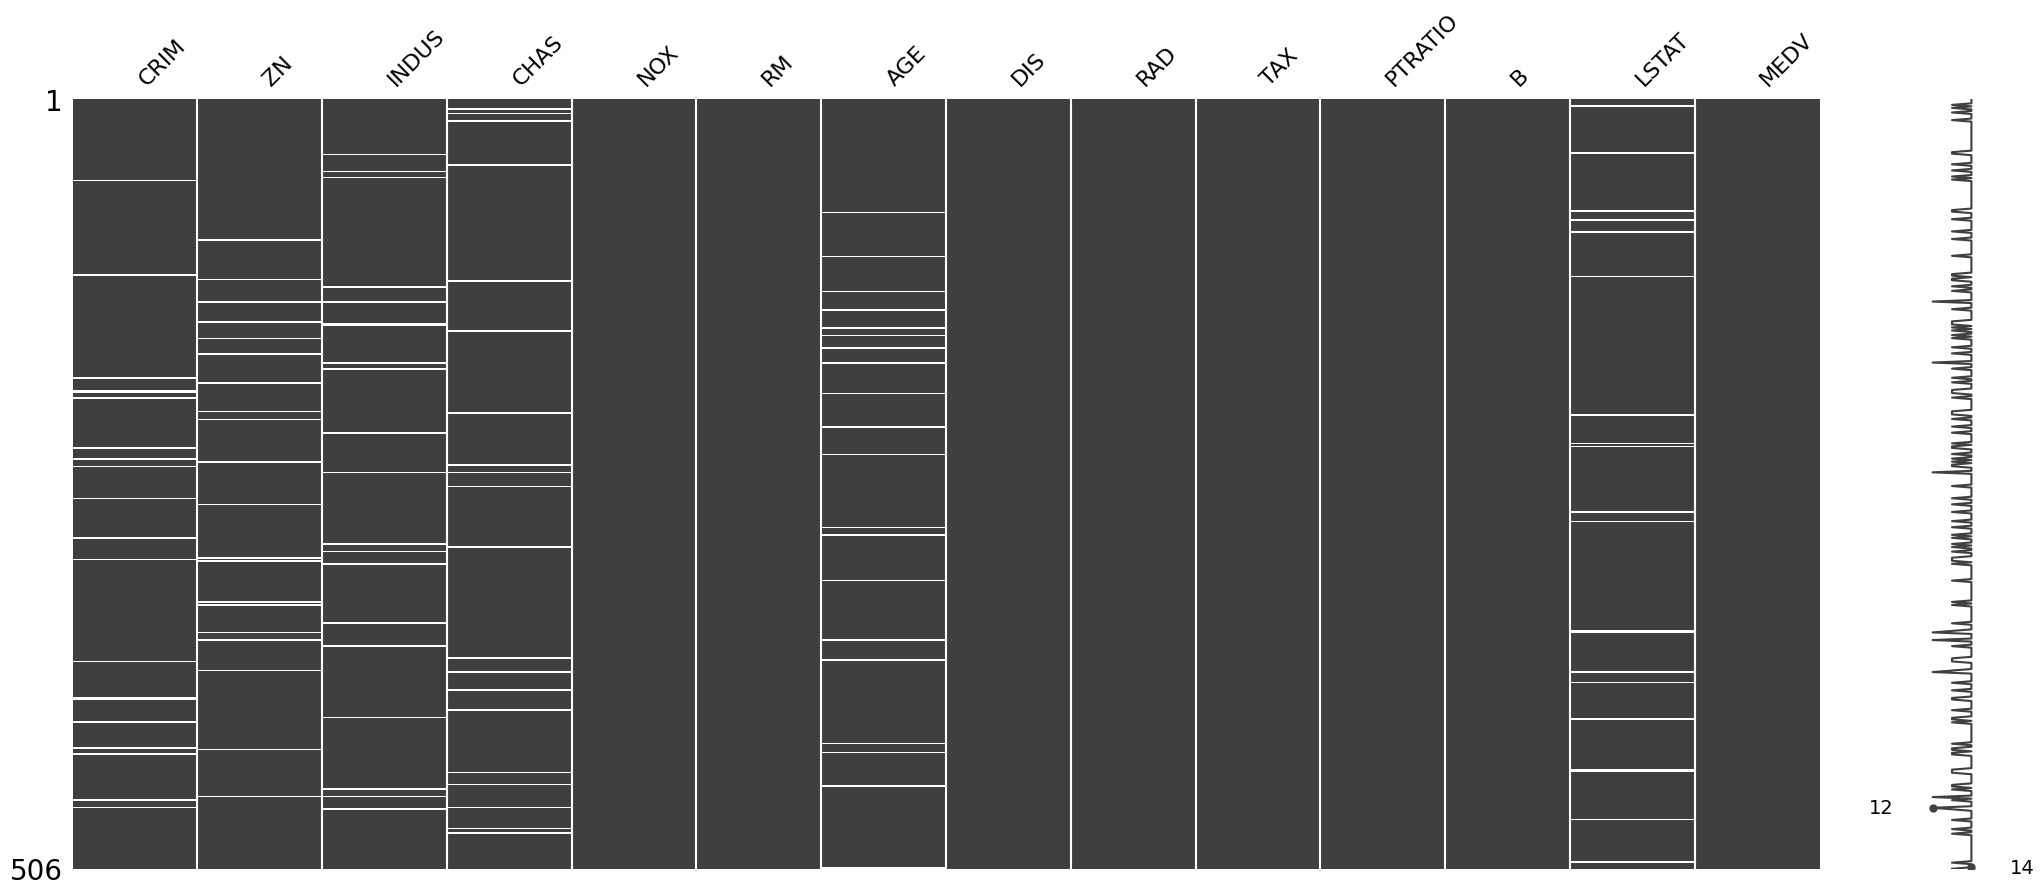

In [ ]:
#Visualize the Variables with Missing Values.
msno.matrix(train)
plt.show()

###Deductions.
1. We can detect missingness in the variables CRIM, ZN, INDUS, CHAS, AGE and LSTAT. (6 Variables).
2. The levels of missingness are low, therefore we shall impute in place, synthetic values.
3. We shall inspect the distribution of the features to determine which metrics to impute for each feature.

###4.1.2 Inspecting Distribution of Features.

In [ ]:
# # Visualize the distribution of each feature
# for column in train.columns:
#     plt.figure(figsize=(0.8, 0.5))
#     if train[column].dtype == 'object':
#         sns.countplot(data=train, x=column)
#     else:
#         sns.histplot(data=train, x=column, kde=True)
#     plt.title(f"Distribution of {column}", fontsize=7)
#     plt.xlabel(column, fontsize=5)
#     plt.ylabel("Frequency", fontsize=5)
#     plt.show()

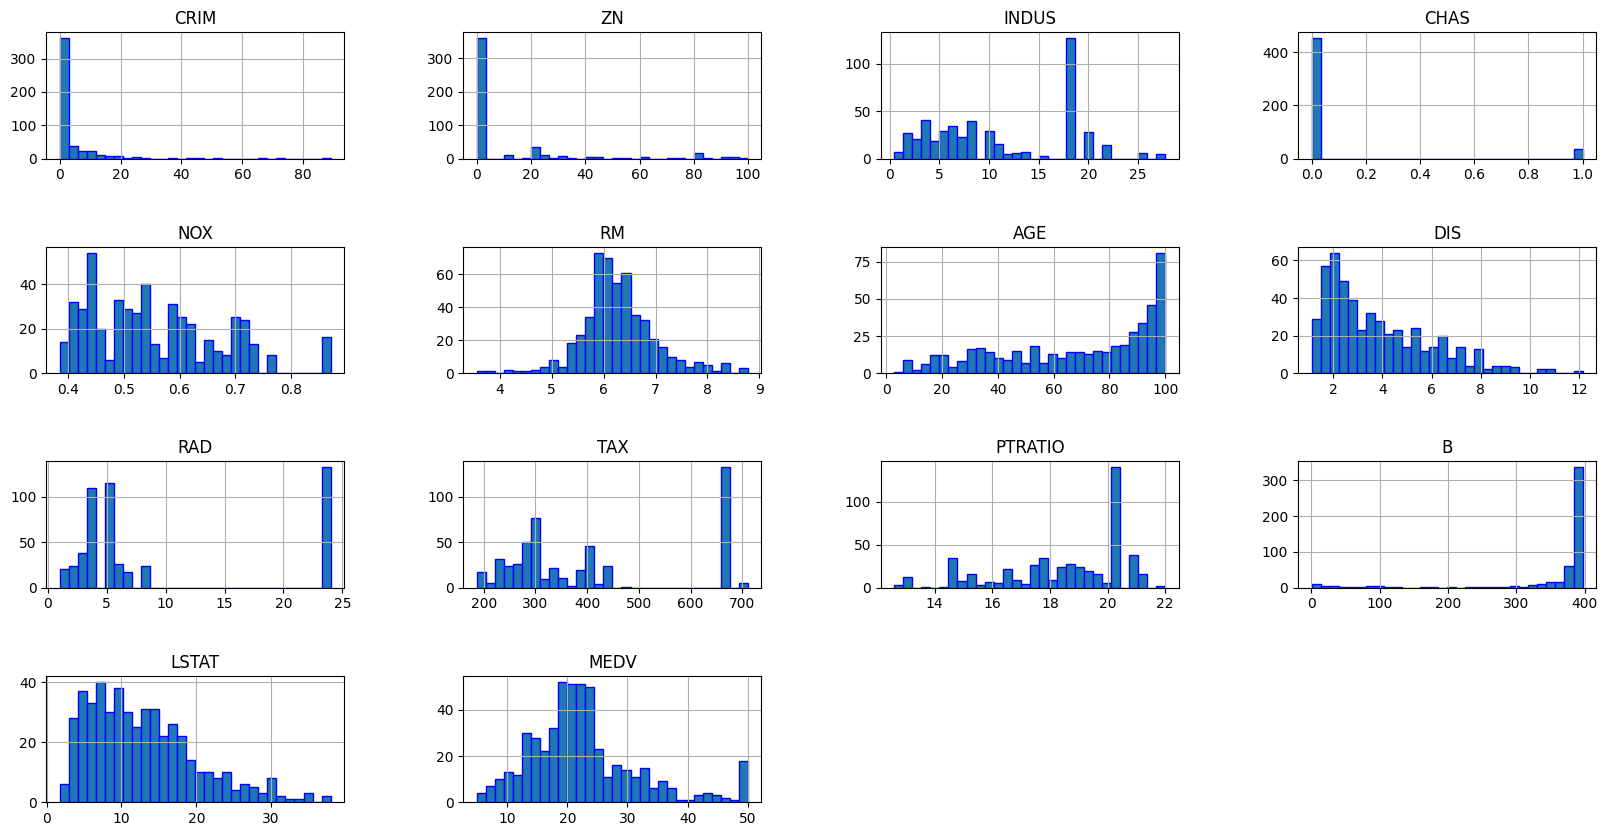

In [ ]:
#Inspecting Distribution of Variables.
train.hist(figsize=(20, 10), bins=30, edgecolor="blue")

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.7, wspace=0.4)

# Show the plot
plt.show()

####Deductions.
1. The columns CRIM, RM, AGE, DIS, B, LSTAT, and MEDV have a normal distribution.
2. We shall impute mean for the missing values in CRIM, AGE and LSTAT.
3. We shall impute the mode in the columns ZN, INDUS, and CHAS.

###4.1.3 Handling Missingness.

In [ ]:
# Impute mean for 'CRIM', 'AGE', and 'LSTAT'
mean_CRIM = train['CRIM'].mean()
mean_AGE = train['AGE'].mean()
mean_LSTAT = train['LSTAT'].mean()
train['CRIM'].fillna(mean_CRIM, inplace=True)
train['AGE'].fillna(mean_AGE, inplace=True)
train['LSTAT'].fillna(mean_LSTAT, inplace=True)

# Impute mode for 'ZN', 'INDUS', and 'CHAS'
mode_ZN = train['ZN'].mode()[0]
mode_INDUS = train['INDUS'].mode()[0]
mode_CHAS = train['CHAS'].mode()[0]
train['ZN'].fillna(mode_ZN, inplace=True)
train['INDUS'].fillna(mode_INDUS, inplace=True)
train['CHAS'].fillna(mode_CHAS, inplace=True)

####Deductions.
1. All the missingness has been dealt with effectively.

##4.2 Exploring Outliers.

In [ ]:
# Function to detect outliers using IQR method
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Detect outliers in each feature
outlier_features = []
for column in train.columns:
    outliers = detect_outliers(train[column])
    if not outliers.empty:
        outlier_features.append(column)

# Print the names of features with outliers
print("Features with outliers:")
for feature in outlier_features:
    print(feature)

Features with outliers:
CRIM
ZN
CHAS
RM
DIS
PTRATIO
B
LSTAT
MEDV


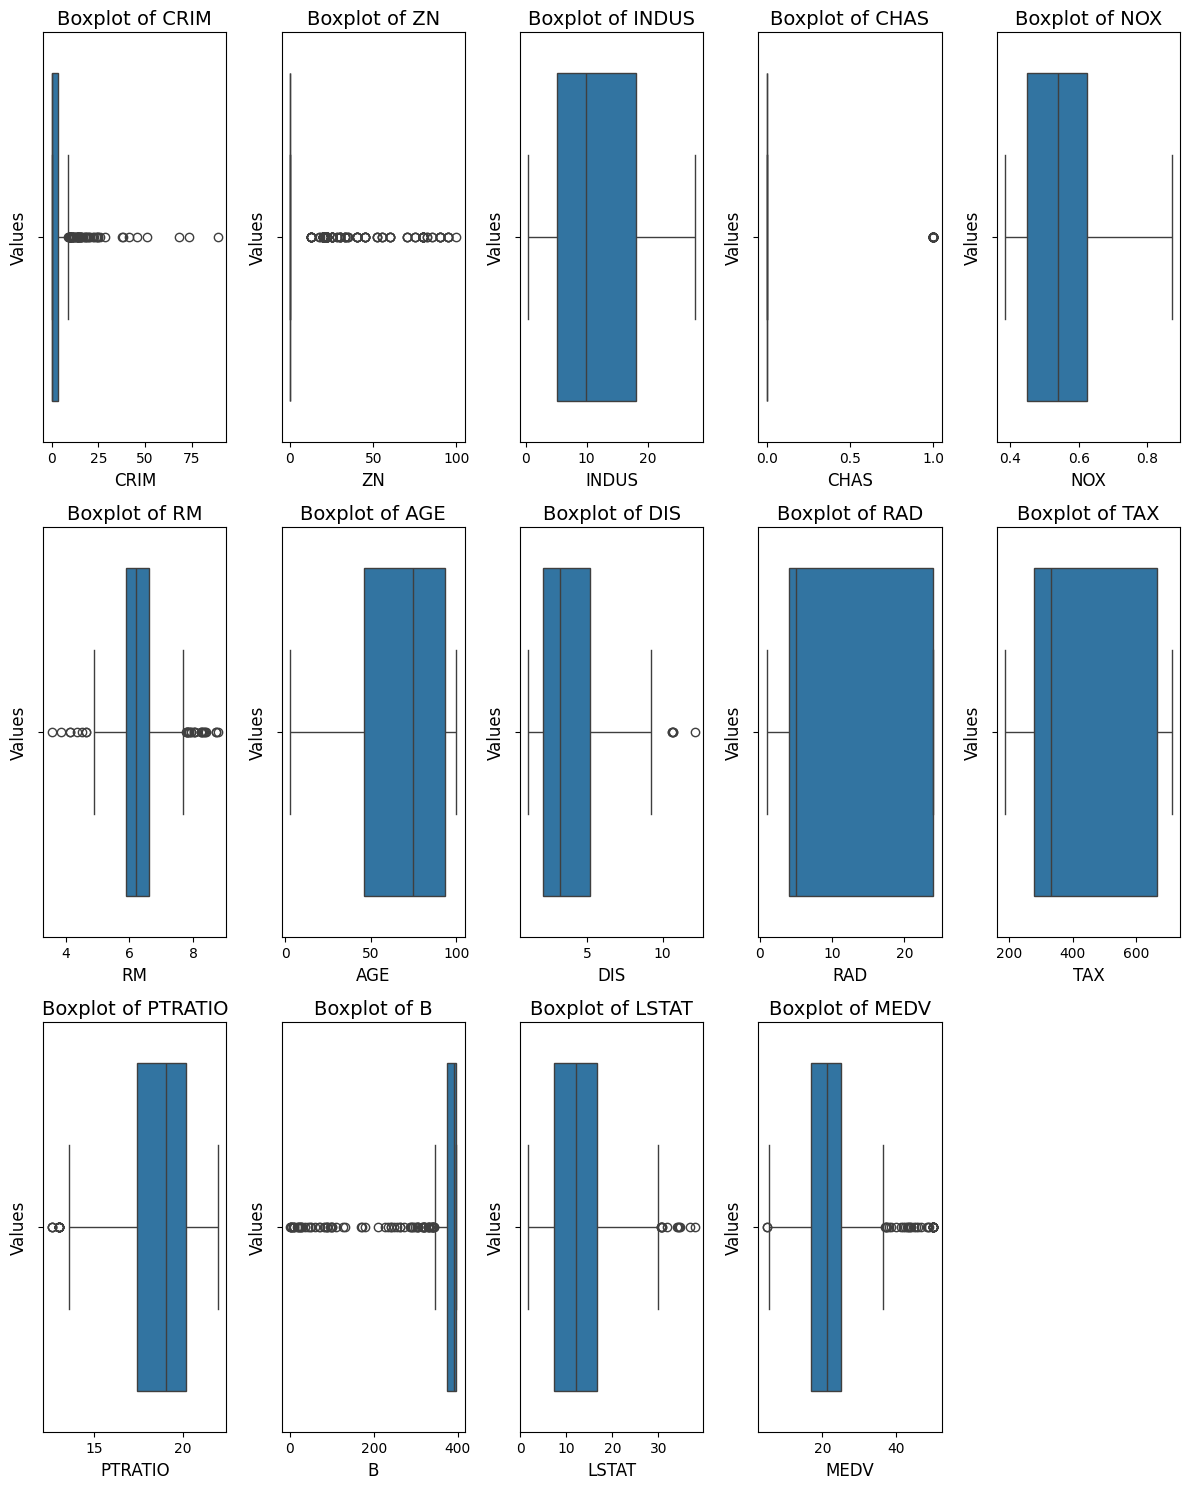

In [ ]:
# Create a grid of plots
num_cols = 5
num_rows = (len(train.columns) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5*num_rows))

# Flatten axes if necessary
axes = axes.flatten()

# Visualize outliers in each feature
for i, column in enumerate(train.columns):
    sns.boxplot(x=train[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Values', fontsize=12)

# Remove empty subplots
for j in range(len(train.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##Deductions.
1. We can detect heavy presence of outliers in the columns CRIM, ZN, RM, B, LSTAT and MEDV.
2. We can detect small presence of outliers in the columns CHAS,DIS and PTRATIO
3. We shall have to deploy a model that is robust to outliers.


#5.0 Fitting PCA Model.

In [ ]:
# Define X and y
X = train.drop(columns=['MEDV'])  # Features
y = train['MEDV']  # Target variable

#Standardization of the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Fit the PCA model.
pca = PCA()
pca.fit(X_scaled)

PCA()

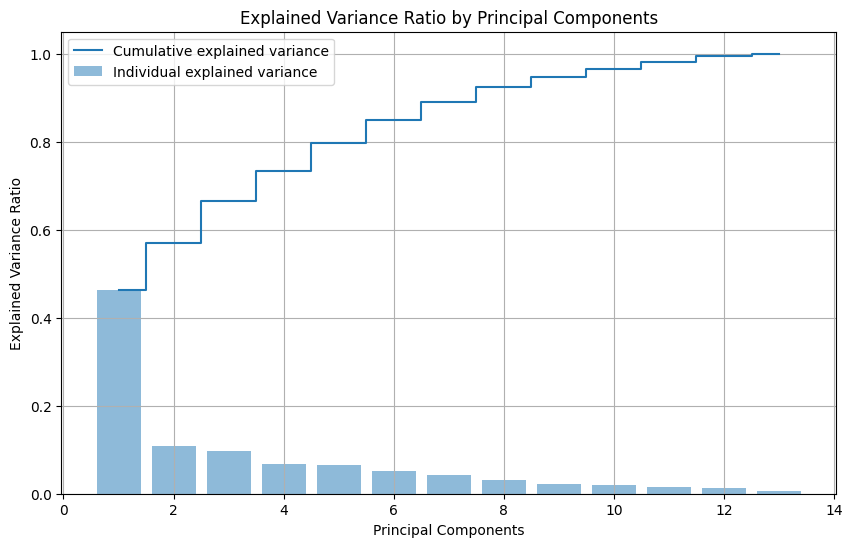

In [ ]:
#Visualize the Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
print(cumulative_variance_ratio)

[0.46196136 0.56932439 0.66594649 0.73279566 0.79697592 0.848409
 0.89139417 0.92345366 0.94648911 0.96523642 0.98140218 0.99470838
 1.        ]


In [ ]:
#Choosing the number of components to explain 95% of the variance
n_components = (cumulative_variance_ratio <= 0.95).sum()
print(n_components)

9


##Deductions.
1. The 1st component explains 50% of the variance in the data.
2. The 2nd component explains 10% of the variance in the data.
3. 9 components will explain 95% of thevariance in the data.
4. We shall convert the data to this lower dimension.

In [ ]:
#Transform the Data
X_pca = pca.transform(X_scaled)[:, :n_components]

In [ ]:
print(X_pca[:10])

[[-2.12897077e+00  7.37766822e-01  3.65995763e-01 -1.00277555e+00
   9.56197908e-02  2.93830051e-01  3.25316344e-01 -2.57363283e-01
  -5.02082861e-01]
 [-1.48496563e+00  5.81288167e-01 -6.90879472e-01 -3.67923530e-01
  -3.26735602e-01 -2.43195531e-01  5.93632793e-01  2.34312928e-01
  -1.07254507e-01]
 [-2.11122940e+00  5.83260854e-01  1.66308554e-01 -3.63263397e-01
  -1.11578764e+00 -4.50661256e-01  5.28995557e-01 -1.19621951e-01
   1.12394009e-01]
 [-2.64728811e+00 -2.92842271e-02 -1.04444661e-01  7.80468096e-02
  -1.15786285e+00 -6.51003983e-01  6.78501356e-01 -2.82875425e-01
  -3.30258582e-01]
 [-2.16865703e+00  4.20120664e-03 -3.63725740e-01 -5.46583179e-02
  -6.98232879e-01 -5.96126889e-01  8.84720489e-01  5.34286541e-01
  -5.73259661e-01]
 [-2.24455158e+00 -2.85609844e-02 -6.72103031e-01  7.68393306e-02
  -6.50935338e-01 -5.33785665e-01  7.01238340e-01 -1.15656844e-01
  -4.51872012e-01]
 [-1.38635483e+00  3.17909213e-01 -3.61951304e-01 -7.41640727e-01
   8.73229128e-01  4.2996563

#6.0 Model Fitting PCA Data.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

##6.1 Simple Linear Regression.

In [ ]:
# Create a Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse_value = mse(y_test, y_pred)

r2_value = r2_score(y_test, y_pred)


print( 'simple linear reg mse value:', mse_value)
print( 'simple linear reg r2 score:',r2_value)

simple linear reg mse value: 26.140135571059467
simple linear reg r2 score: 0.6491873626797473


##6.2 Ridge Regression.

In [ ]:
pipe = make_pipeline(RobustScaler(),PolynomialFeatures(degree=1), Ridge(alpha=10))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2')

print('r2 scores for individual folds in Ridge Regression:',scores)
print('mean of r2 scores in Ridge Regression:', scores.mean())

r2 scores for individual folds in Ridge Regression: [0.74413816 0.51861874 0.69385827 0.76523859 0.65145919]
mean of r2 scores in Ridge Regression: 0.6746625903264354


##6.3 Lasso Regression.

In [ ]:
pipe = make_pipeline(RobustScaler(),PolynomialFeatures(degree=2), Lasso(alpha=0.2, max_iter=1000))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2')

print('r2 scores for individual folds in Lasso Regression:',scores)
print('mean of r2 scores in Lasso Regression:', scores.mean())

r2 scores for individual folds in Lasso Regression: [0.81408637 0.44059508 0.79232932 0.7736618  0.75186465]
mean of r2 scores in Lasso Regression: 0.7145074429045819


##Deductions.
1. Fitting the models on the PCA data provides a more robust model which has achieved a better bias, variance tradeoff, compared to fitting the model on the original data.